In [83]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [84]:
data_train = pd.read_csv("C:/Users/Farhad/Desktop/python/Machine_Learning/train_House_price.csv")
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [85]:
X_train = data_train[['OverallQual', 'GrLivArea', 'GarageCars', 'PoolArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'FullBath', '1stFlrSF', '2ndFlrSF']].values
Y_train = data_train['SalePrice'].values    

X_train.shape, Y_train.shape

((1460, 10), (1460,))

In [86]:
# نرمال‌سازی داده‌ها
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)

scaler_Y = StandardScaler()
Y_train = scaler_Y.fit_transform(Y_train.reshape(-1, 1)).ravel()

In [87]:
# تقسیم داده‌ها به آموزش و اعتبارسنجی
X_train_split, X_val, Y_train_split, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
print("X_train_split shape:", X_train_split.shape)
print("X_val shape:", X_val.shape)
print("Y_train_split shape:", Y_train_split.shape)
print("Y_val shape:", Y_val.shape)

X_train_split shape: (1168, 10)
X_val shape: (292, 10)
Y_train_split shape: (1168,)
Y_val shape: (292,)


In [88]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='sigmoid'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(14, activation='tanh'),
    tf.keras.layers.Dense(1, activation='linear') # چون رگرشن هست
])

In [89]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse')  

In [90]:
# آموزش مدل با اعتبارسنجی
output = model.fit(X_train_split, Y_train_split, 
                   epochs=400, 
                   validation_data=(X_val, Y_val))

Epoch 1/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4114 - val_loss: 0.2769
Epoch 2/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1921 - val_loss: 0.2895
Epoch 3/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2177 - val_loss: 0.2132
Epoch 4/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2091 - val_loss: 0.2207
Epoch 5/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1981 - val_loss: 0.1993
Epoch 6/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1429 - val_loss: 0.2090
Epoch 7/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1615 - val_loss: 0.1968
Epoch 8/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1613 - val_loss: 0.1955
Epoch 9/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1229 - val_loss: 0.2184
Epoch 10/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1446 - val_loss: 0.2237
Epoch 11/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1961 - val_loss: 0.1909
Epoch 12/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1

KeyboardInterrupt: 

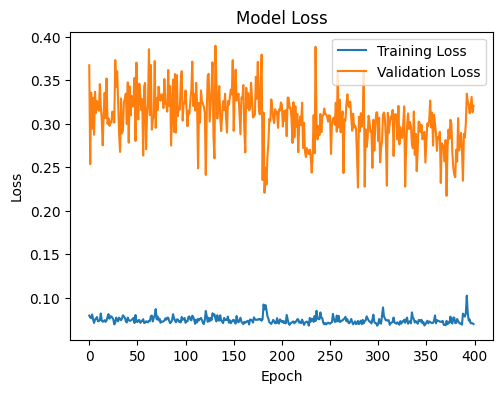

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(output.history['loss'], label='Training Loss')
plt.plot(output.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# پیش‌بینی برای یه خانه نمونه
my_house = np.array([[7, 1500, 2, 0, 500, 1200, 2005, 2, 1000, 500]])
my_house_scaled = scaler_X.transform(my_house)
my_house_pred = model.predict(my_house_scaled)
my_house_price = scaler_Y.inverse_transform(my_house_pred.reshape(-1, 1))
print(f"Predicted Sale Price for my house: ${my_house_price[0][0]:,.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Sale Price for my house: $187,804.19


In [91]:
model.save("my_house_price_model.h5")

#model = tf.keras.models.load_model("C:/Users/Farhad/Desktop/python/Machine_Learning/my_house_price_model.h5")